# Context

Here in this Dataset we have a Supervised Machine Learning Problem, For Heart Failure Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 15 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

# About The Dataset

age: Age of the patient

sex: Sex of the patient

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exng: Exercise induced angina ~ 1 = Yes, 0 = No

o2Saturation: Oxygen saturation level ~ A normal level of oxygen is usually 95% or higher.

output: Target variable

## Task

To perform EDA and predict if a person is prone to a heart attack or not.

# Preparation

## Importing all the libraries needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import session_info
session_info.show()

## Reading The Dataset

In [2]:
df0 = pd.read_csv("heart.csv")
df1 = pd.read_csv("o2Saturation.csv")
df1.drop(df1.index[303:],inplace=True)

df = pd.concat([df0, df1],axis = 1)
cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'o2Saturation','output']
df = df[cols]
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,o2Saturation,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,98.6,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,98.6,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,98.6,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,98.6,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,98.1,1


## Checking the shape of DataFrame

In [3]:
print('Number of rows are', df.shape[0], 'and number of colunms are', df.shape[1])

Number of rows are 303 and number of colunms are 15


## Checking for null values

In [4]:
df.isnull().sum() / len(df) * 100

age             0.0
sex             0.0
cp              0.0
trtbps          0.0
chol            0.0
fbs             0.0
restecg         0.0
thalachh        0.0
exng            0.0
oldpeak         0.0
slp             0.0
caa             0.0
thall           0.0
o2Saturation    0.0
output          0.0
dtype: float64

No null values found

## Checking For datatypes of the attributes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trtbps        303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalachh      303 non-null    int64  
 8   exng          303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    int64  
 11  caa           303 non-null    int64  
 12  thall         303 non-null    int64  
 13  o2Saturation  303 non-null    float64
 14  output        303 non-null    int64  
dtypes: float64(2), int64(13)
memory usage: 35.6 KB


All attributes are of type 'int' except 'oldpeak' and 'o2Saturation'

## Checking the number of unique values in each column

In [6]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict, index = ["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


## Separating the columns in categorical and continuous

In [7]:
cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak", "o2Saturation"]
target_col = ["output"]

print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'o2Saturation']
The target variable is :   ['output']


## Checking statistical data

In [8]:
df[con_cols].describe()

,age,trtbps,chol,thalachh,oldpeak,o2Saturation
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,97.484488
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.352649
min,29.000000,94.000000,126.000000,71.000000,0.000000,96.500000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,97.500000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,97.500000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,97.500000
max,77.000000,200.000000,564.000000,202.000000,6.200000,98.600000


# Exploratory Data Analysis / Data Visualization

## Univariate Analysis

### Count plot of categorical features

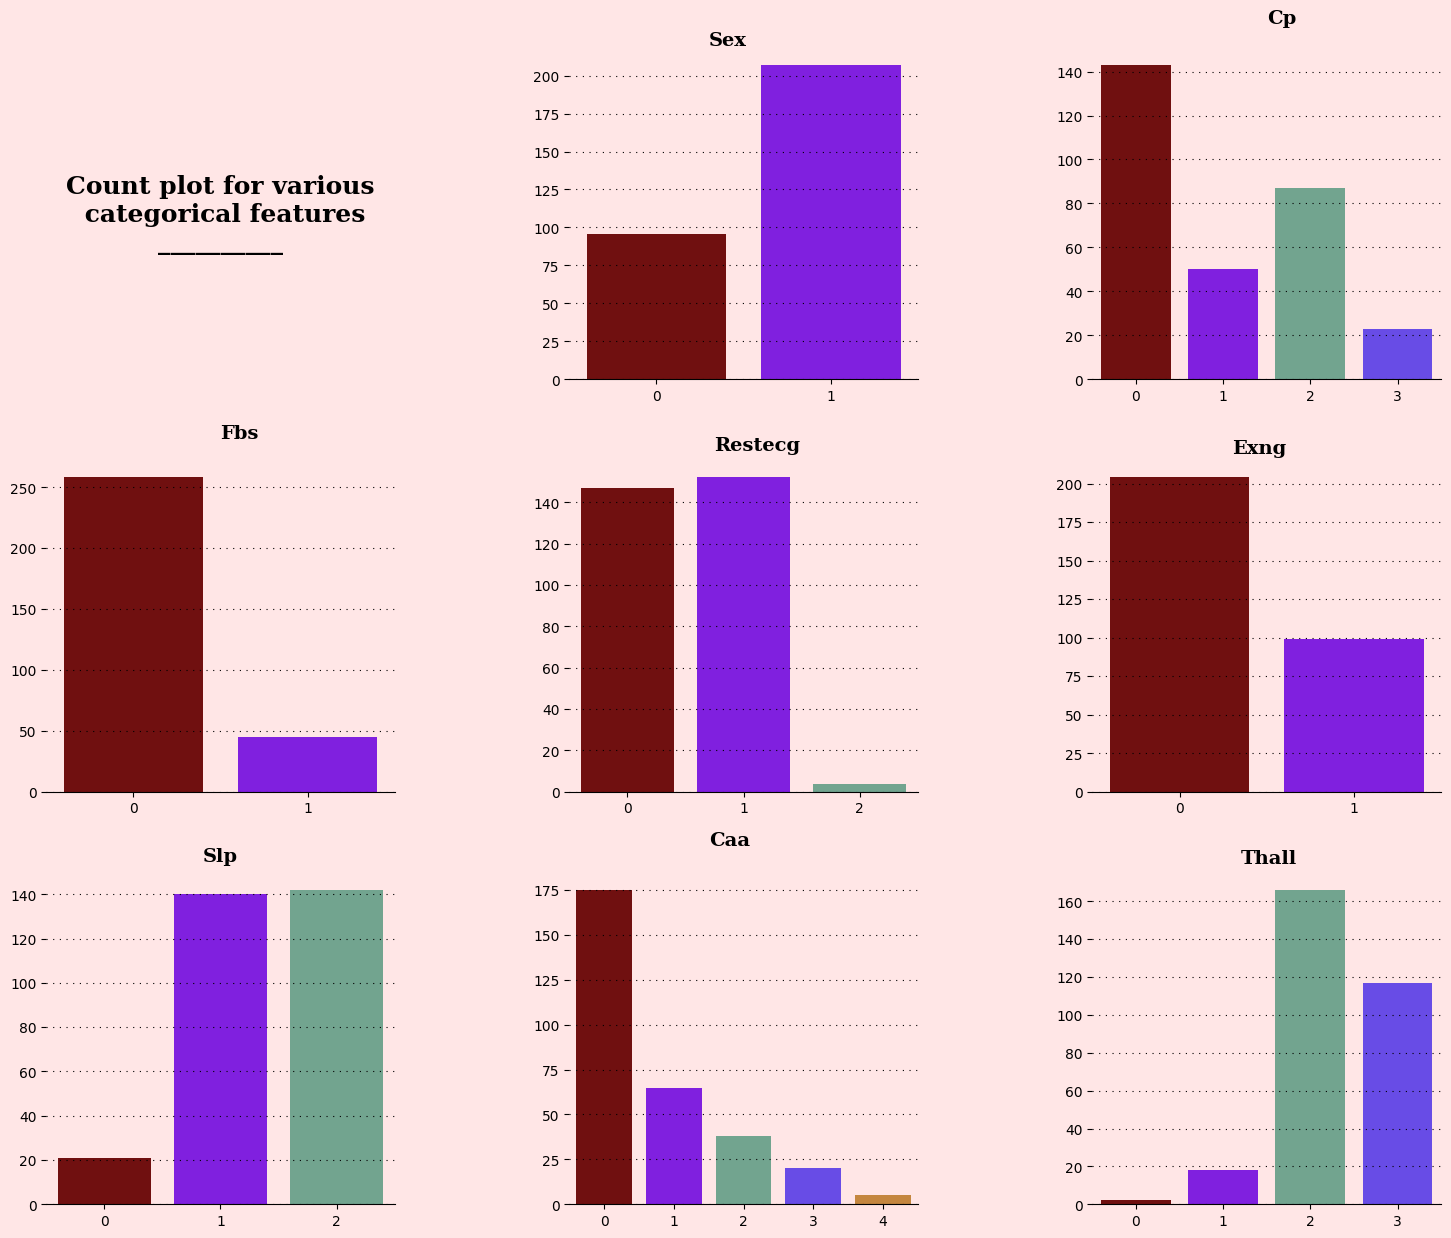

In [9]:
fig = plt.figure(figsize = (18, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace = 0.5, hspace = 0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#ffe6e6"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left = False, bottom = False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5,
            'Count plot for various\n categorical features\n__________',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            fontsize = 18, fontweight = 'bold',
            fontfamily = 'serif',
            color = "#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax1.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.countplot(ax = ax1, data = df, x = 'sex', palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Cp count
ax2.text(1.5, 162, 'Cp', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax2.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.countplot(ax = ax2, data = df, x = 'cp', palette = color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Fbs count
ax3.text(0.5, 290, 'Fbs', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax3.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.countplot(ax = ax3, data = df, x = 'fbs', palette = color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Restecg count
ax4.text(0.75, 165, 'Restecg', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax4.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.countplot(ax = ax4, data = df, x = 'restecg', palette = color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Exng count
ax5.text(0.3, 220, 'Exng', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax5.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.countplot(ax = ax5, data = df, x = 'exng', palette = color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Slp count
ax6.text(0.85, 155, 'Slp', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax6.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.countplot(ax = ax6, data = df, x = 'slp', palette = color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Caa count
ax7.text(1.5, 200, 'Caa', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax7.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.countplot(ax = ax7, data = df, x = 'caa', palette = color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax8.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.countplot(ax = ax8, data = df, x = 'thall', palette = color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top", "right", "left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

#### Breakdown of gender

In [10]:
x = df.sex.value_counts()
print(f'Number of people having sex as 0 are {x[0]} and Number of people having sex as 1 are {x[1]}')

Number of people having sex as 0 are 96 and Number of people having sex as 1 are 207


People having gender as 1 are more than twice the people having gender as 0

#### Breakdown for chest pain

In [11]:
x = df.cp.value_counts()
print(x)

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64


1. It can be observed people have chest pain of type 0 i.e 'Typical Angina' is the highest.

2. It can be observed people have chest pain of type 3 i.e 'Asymptomatic' is the lowest

3. It can also be observed people with chest pain of type 0 is almost 50% of all the people.

#### Breakdown of FBS

In [12]:
x = (df.fbs.value_counts())
print(x)

fbs
0    258
1     45
Name: count, dtype: int64


FBS with value 0 is significantly higher than value 1.

#### Breakdown of ECG

In [13]:
x = (df.restecg.value_counts())
print(x)

restecg
1    152
0    147
2      4
Name: count, dtype: int64


ECG count is almost the same for type 0 and 1.
Also, for type 2 its almost negligible in comparision to type 0 and 1.

#### Breakdown for Exercise Induced Angina

In [14]:
x = (df.exng.value_counts())
print(x)

exng
0    204
1     99
Name: count, dtype: int64


EXNG count is more than double for type 0

#### Breakdown of Slope

In [15]:
x = (df.slp.value_counts())
print(x)

slp
2    142
1    140
0     21
Name: count, dtype: int64


Slope is almost the same for type 1 and 2.
Also, for type 0 its almost negligible in comparision to type 1 and 2.

#### Breakdown of Number of Major Vessels

In [16]:
x = (df.caa.value_counts())
print(x)

caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


The count of number of major vessels is max for type 0 and min for type 4.

#### Breakdown for Thalium Stress Test

In [17]:
x = (df.thall.value_counts())
print(x)

thall
2    166
3    117
1     18
0      2
Name: count, dtype: int64


Thall count is max for type 2 and min for type 0.

### Boxen plot of continuous features

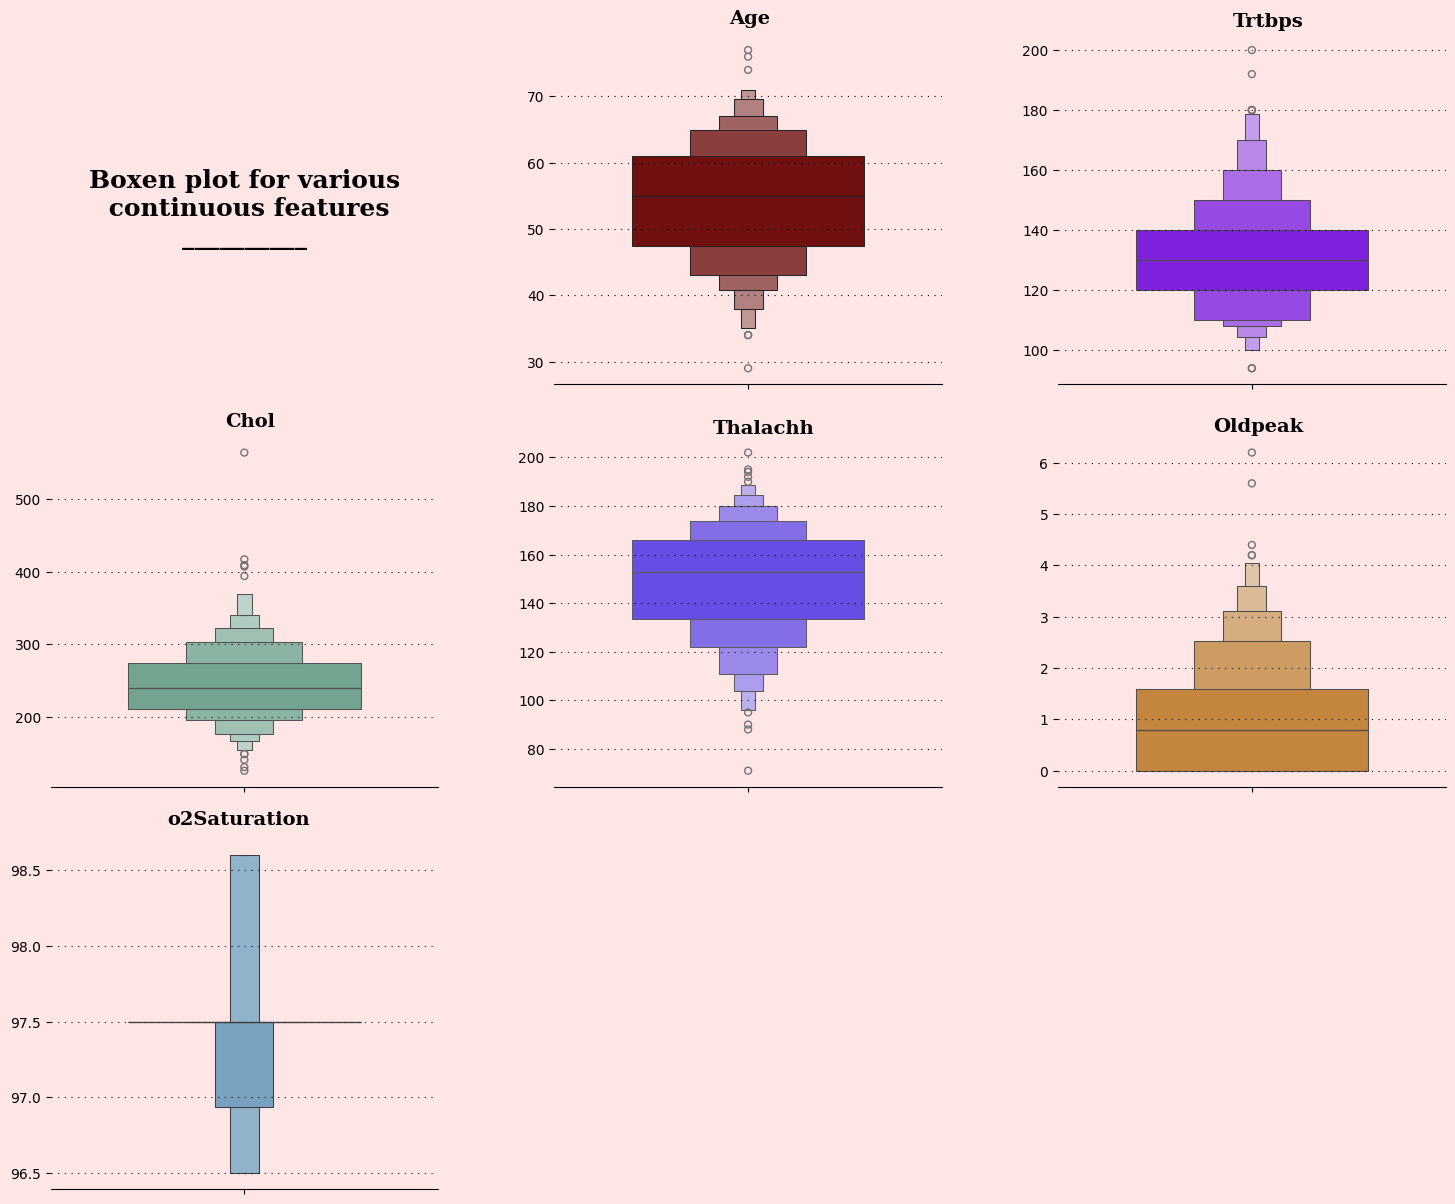

In [18]:
fig = plt.figure(figsize = (18, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace = 0.3, hspace = 0.15)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])

background_color = "#ffe6e6"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left = False, bottom = False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5,
            'Boxen plot for various\n continuous features\n__________',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            fontsize = 18, fontweight = 'bold',
            fontfamily = 'serif',
            color = "#000000")

# Age
ax1.text(-0.05, 81, 'Age', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax1.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.boxenplot(ax = ax1, y = df['age'], palette = ["#800000"], width = 0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps
ax2.text(-0.05, 208, 'Trtbps', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax2.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.boxenplot(ax = ax2, y = df['trtbps'], palette = ["#8000ff"], width = 0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol
ax3.text(-0.05, 600, 'Chol', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax3.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.boxenplot(ax = ax3, y = df['chol'], palette = ["#6aac90"], width = 0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh
ax4.text(-0.09, 210, 'Thalachh', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax4.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.boxenplot(ax = ax4, y = df['thalachh'], palette = ["#5833ff"], width = 0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax5.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.boxenplot(ax = ax5, y = df['oldpeak'], palette = ["#da8829"], width = 0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

# o2Saturation
ax6.text(-0.20, 98.8, 'o2Saturation', fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax6.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.boxenplot(ax = ax6, y = df['o2Saturation'], width = 0.6)
ax6.set_xlabel("")
ax6.set_ylabel("")

for s in ["top", "right", "left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)

#### Breakdown of Age

In [19]:
x = df.age.value_counts().sort_index()
print(x)
max_count = x.idxmax()
print("Value with maximum count:", max_count)

age
29     1
34     2
35     4
37     2
38     3
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: count, dtype: int64
Value with maximum count: 58


While ranging from 29 to 77, Most people are of age 58.

#### Breakdown of Resting Blood Pressure

In [20]:
x = df.trtbps.value_counts().sort_index()
print(x)
max_count = x.idxmax()
print("Value with maximum count:", max_count)

trtbps
94      2
100     4
101     1
102     2
104     1
105     3
106     1
108     6
110    19
112     9
114     1
115     3
117     1
118     7
120    37
122     4
123     1
124     6
125    11
126     3
128    12
129     1
130    36
132     8
134     5
135     6
136     3
138    13
140    32
142     3
144     2
145     5
146     2
148     2
150    17
152     5
154     1
155     1
156     1
160    11
164     1
165     1
170     4
172     1
174     1
178     2
180     3
192     1
200     1
Name: count, dtype: int64
Value with maximum count: 120


While ranging from 94 to 200, Most people have the Resting Blood Pressure of 120 (in mm Hg)

#### Breakdown of Cholestoral fetched via BMI sensor

In [21]:
x = df.chol.value_counts().sort_index()
print(x)
max_count = x.idxmax()
print("Value with maximum count:", max_count)

chol
126    1
131    1
141    1
149    2
157    1
      ..
394    1
407    1
409    1
417    1
564    1
Name: count, Length: 152, dtype: int64
Value with maximum count: 197


While ranging from 126 to 564, Most people have the Cholesetrol level of 197 (in mg/dl)

#### Breakdown of Maximum Heart Rate

In [22]:
x = df.thalachh.value_counts().sort_index()
print(x)
max_count = x.idxmax()
print("Value with maximum count:", max_count)

thalachh
71     1
88     1
90     1
95     1
96     2
      ..
190    1
192    1
194    1
195    1
202    1
Name: count, Length: 91, dtype: int64
Value with maximum count: 162


While ranging from 71 to 202, Most people have the Maximum Heart Rate of 162

#### Breakdown of Old Peak i.e.Previous Peak

In [23]:
x = df.oldpeak.value_counts().sort_index()
print(x)
max_count = x.idxmax()
print("Value with maximum count:", max_count)

oldpeak
0.0    99
0.1     7
0.2    12
0.3     3
0.4     9
0.5     5
0.6    14
0.7     1
0.8    13
0.9     3
1.0    14
1.1     2
1.2    17
1.3     1
1.4    13
1.5     5
1.6    11
1.8    10
1.9     5
2.0     9
2.1     1
2.2     4
2.3     2
2.4     3
2.5     2
2.6     6
2.8     6
2.9     1
3.0     5
3.1     1
3.2     2
3.4     3
3.5     1
3.6     4
3.8     1
4.0     3
4.2     2
4.4     1
5.6     1
6.2     1
Name: count, dtype: int64
Value with maximum count: 0.0


While ranging from 0 to 6.2, Most people have the Old Peak of 0

#### Breakdown of o2Saturation

In [24]:
x = df.o2Saturation.value_counts().sort_index()
print(x)
max_count = x.idxmax()
print("Value with maximum count:", max_count)

o2Saturation
96.5     19
97.0      4
97.1      2
97.5    260
98.0      2
98.1      3
98.6     13
Name: count, dtype: int64
Value with maximum count: 97.5


While ranging from 96.5 to 98.6, Most people have the o2 Saturation of 97.5

### Count plot of target

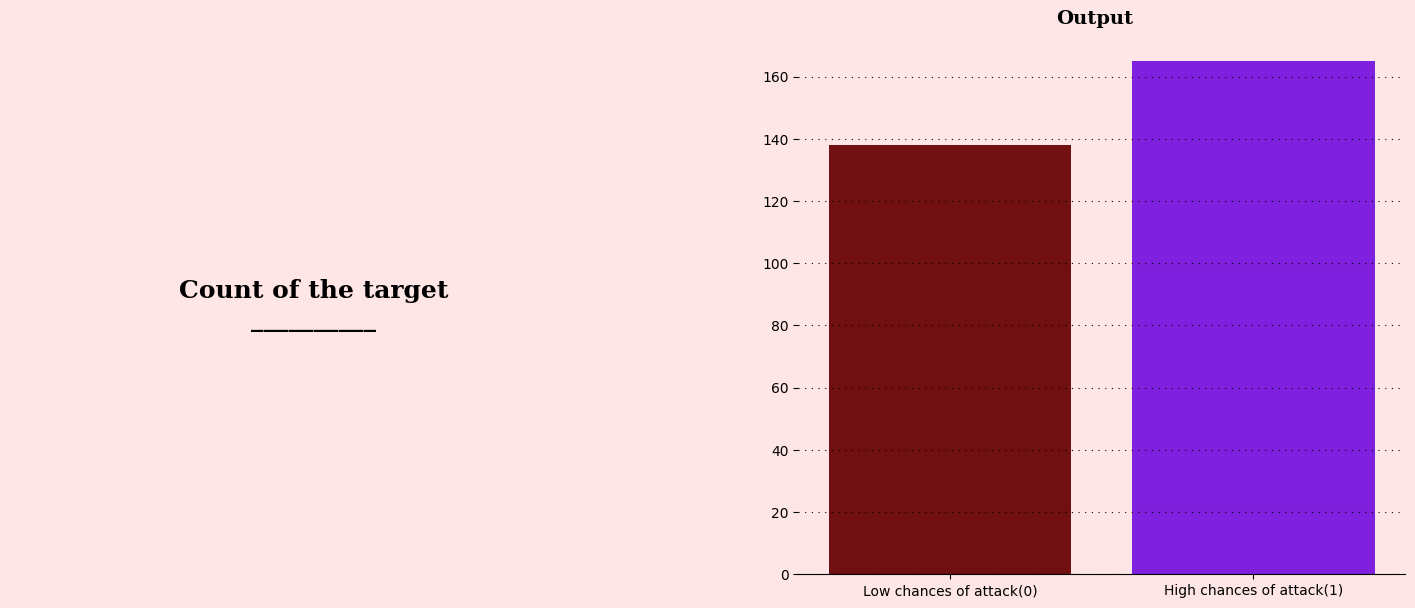

In [25]:
fig = plt.figure(figsize = (18, 7))
gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.3, hspace = 0.15)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

background_color = "#ffe6e6"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

#Title of the plot
ax0.text(0.5, 0.5,
            "Count of the target\n__________",
            horizontalalignment = 'center',
            verticalalignment = 'center',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily = 'serif',
            color = '#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left = False, bottom = False)

# Target Count
ax1.text(0.35, 177, "Output", fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax1.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.countplot(ax = ax1, data = df, x = 'output', palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)", "High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

#### Breakdown of Target Variable

In [26]:
x = df.output.value_counts()
print(x)

output
1    165
0    138
Name: count, dtype: int64


People prone to heart attack i.e.1 are more than the people with less chances of having a heart attack i.e.0

## Bivariate Analysis

### Correlation matrix of continuous features

In [27]:
df_corr = df[con_cols].corr()
df_corr

,age,trtbps,chol,thalachh,oldpeak,o2Saturation
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.002252
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,0.043490
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.022873
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.157801
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.030053
o2Saturation,-0.002252,0.043490,-0.022873,0.157801,0.030053,1.000000


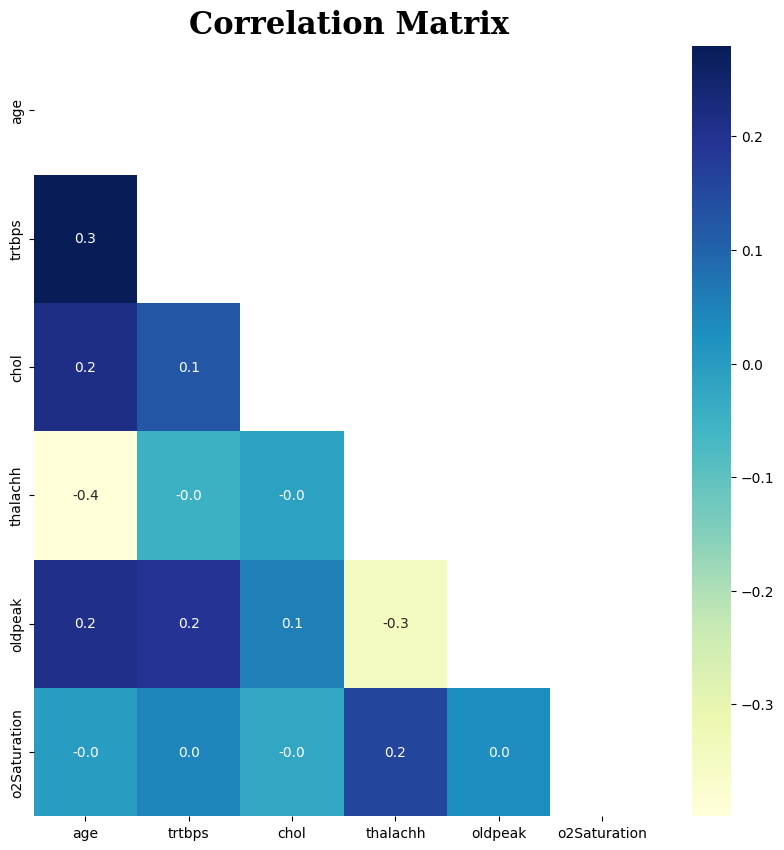

In [28]:
fig = plt.figure(figsize = (10, 10))
gs = fig.add_gridspec(1, 1)
gs.update(wspace = 0.3, hspace = 0.15)
ax0 = fig.add_subplot(gs[0, 0])

color_palette = ["#5833ff", "#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5, -0.1, "Correlation Matrix", fontsize = 22, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
df_corr = df[con_cols].corr()
sns.heatmap(df_corr, mask = mask, fmt = ".1f", annot = True, cmap = 'YlGnBu')
plt.show()

Lighter shades represents positive correlation
Darker shades represents negative correlation

### Scatterplot heatmap of dataframe

<Figure size 1200x1200 with 0 Axes>

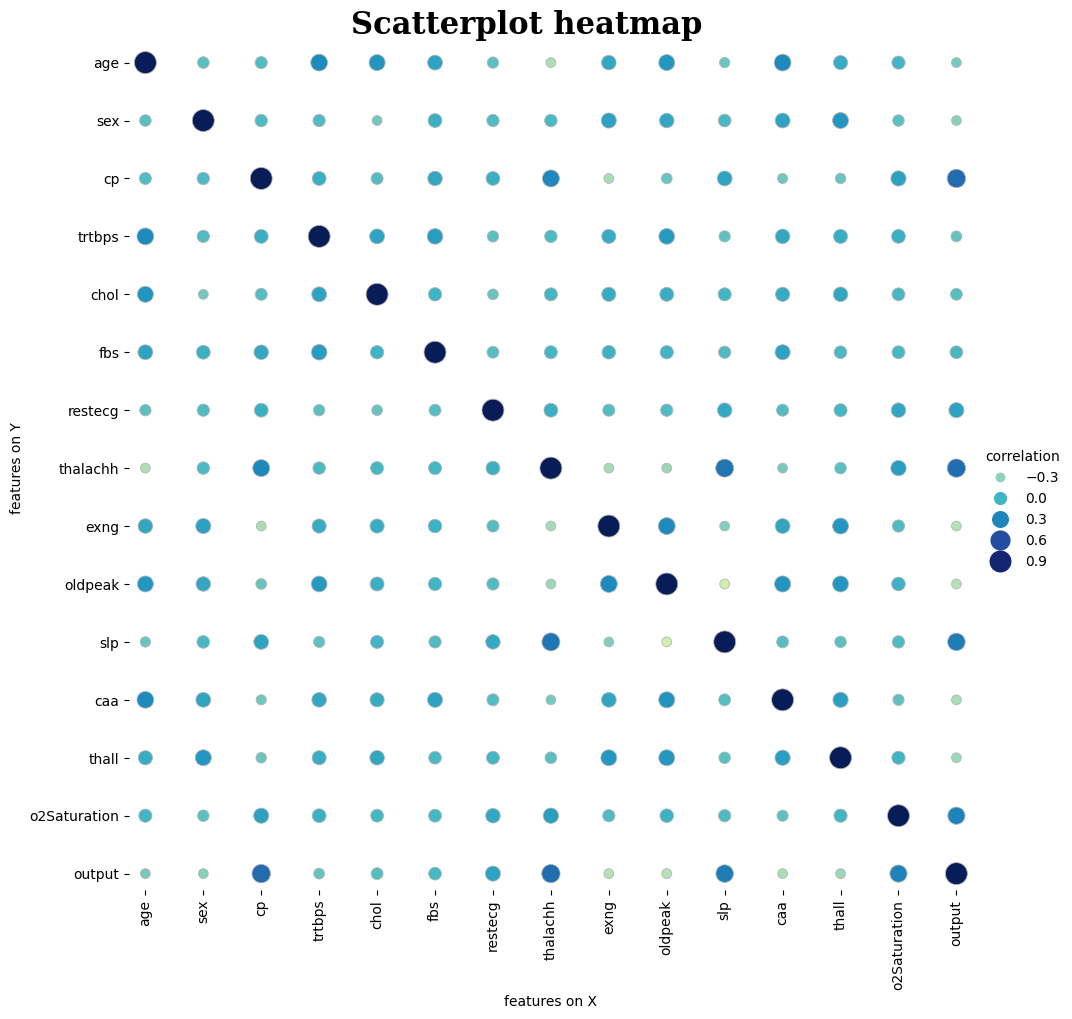

In [29]:
fig = plt.figure(figsize = (12, 12))
corr_mat = df.corr().stack().reset_index(name = "correlation")
g = sns.relplot(
    data = corr_mat,
    x = "level_0", y = "level_1", hue = "correlation", size = "correlation",
    palette = "YlGnBu", hue_norm = (-1, 1), edgecolor = ".7",
    height = 10, sizes = (50, 250), size_norm = (-.2, .8),
)
g.set(xlabel = "features on X", ylabel = "features on Y", aspect = "equal")
g.fig.suptitle('Scatterplot heatmap', fontsize = 22, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
g.despine(left = True, bottom = True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_color(".7")
plt.show()

### Distribution of continuous features according to target variable

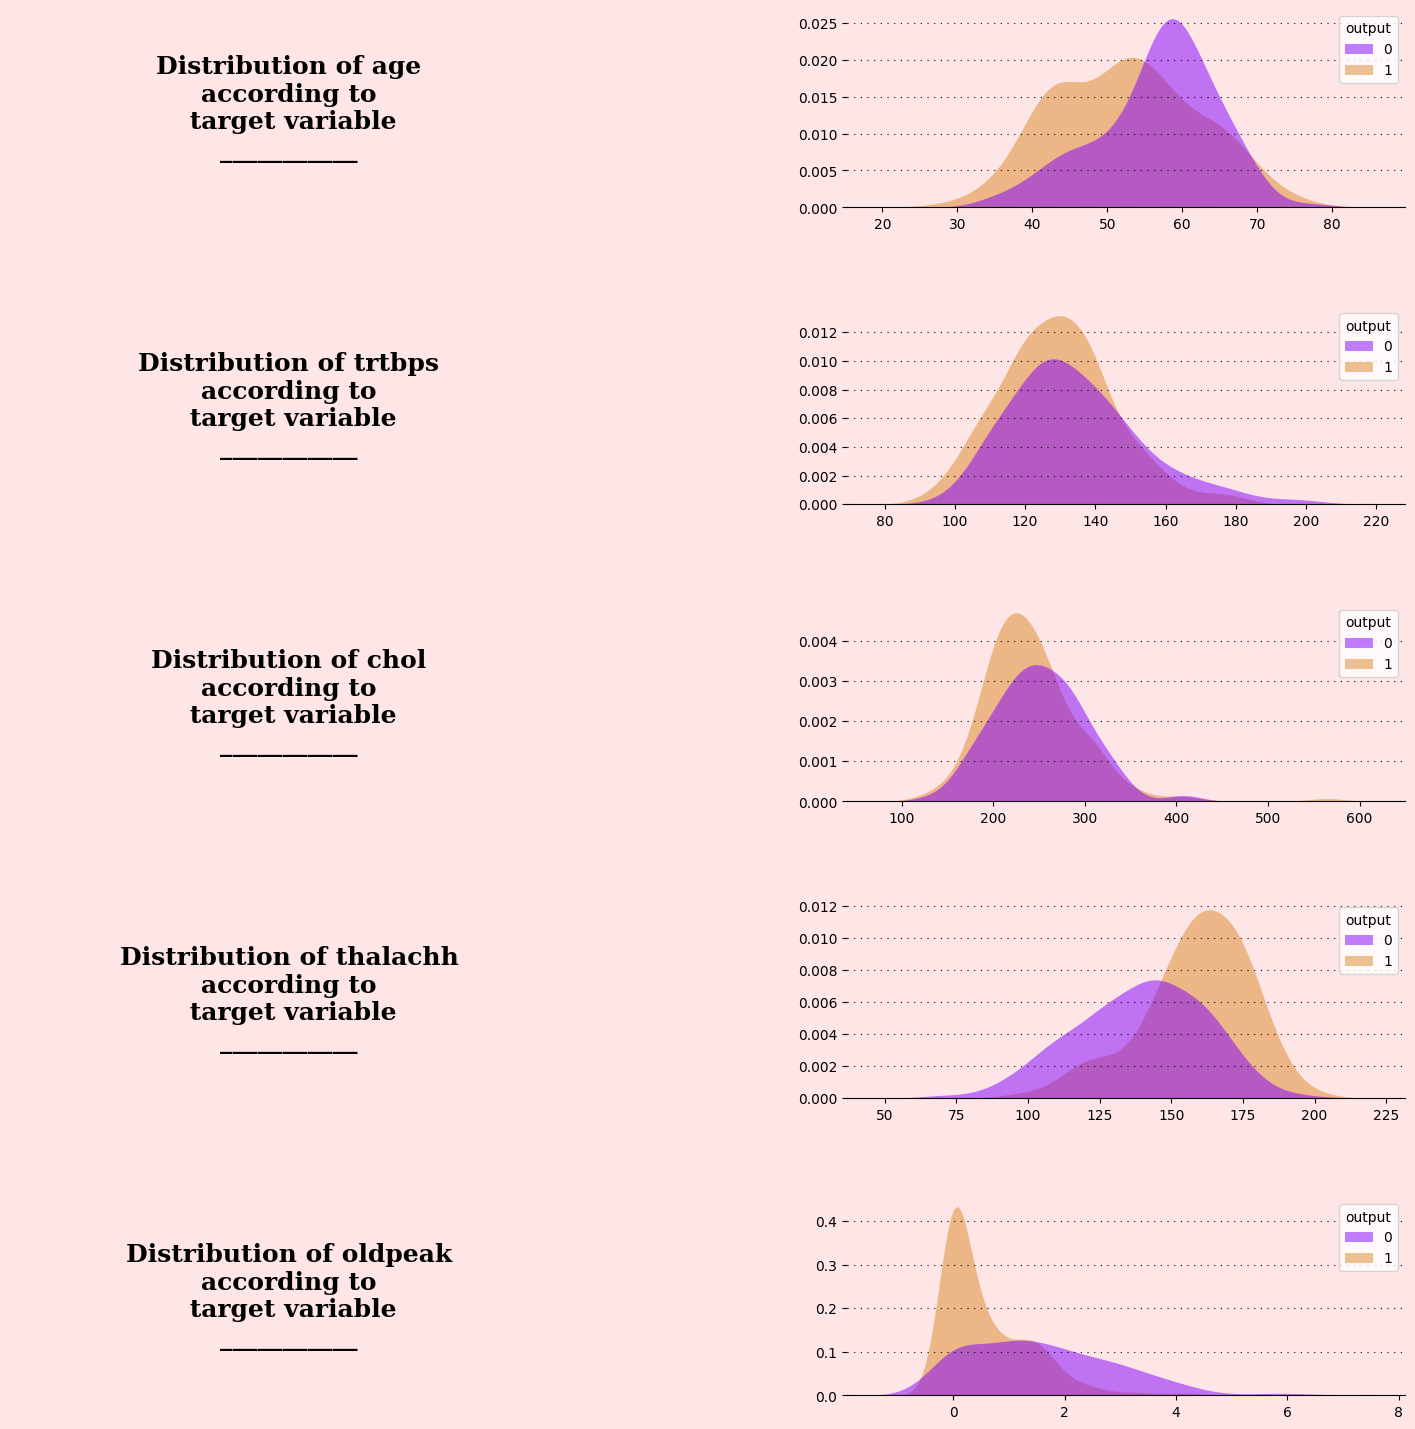

In [30]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

### Some other relations that seem intuitive

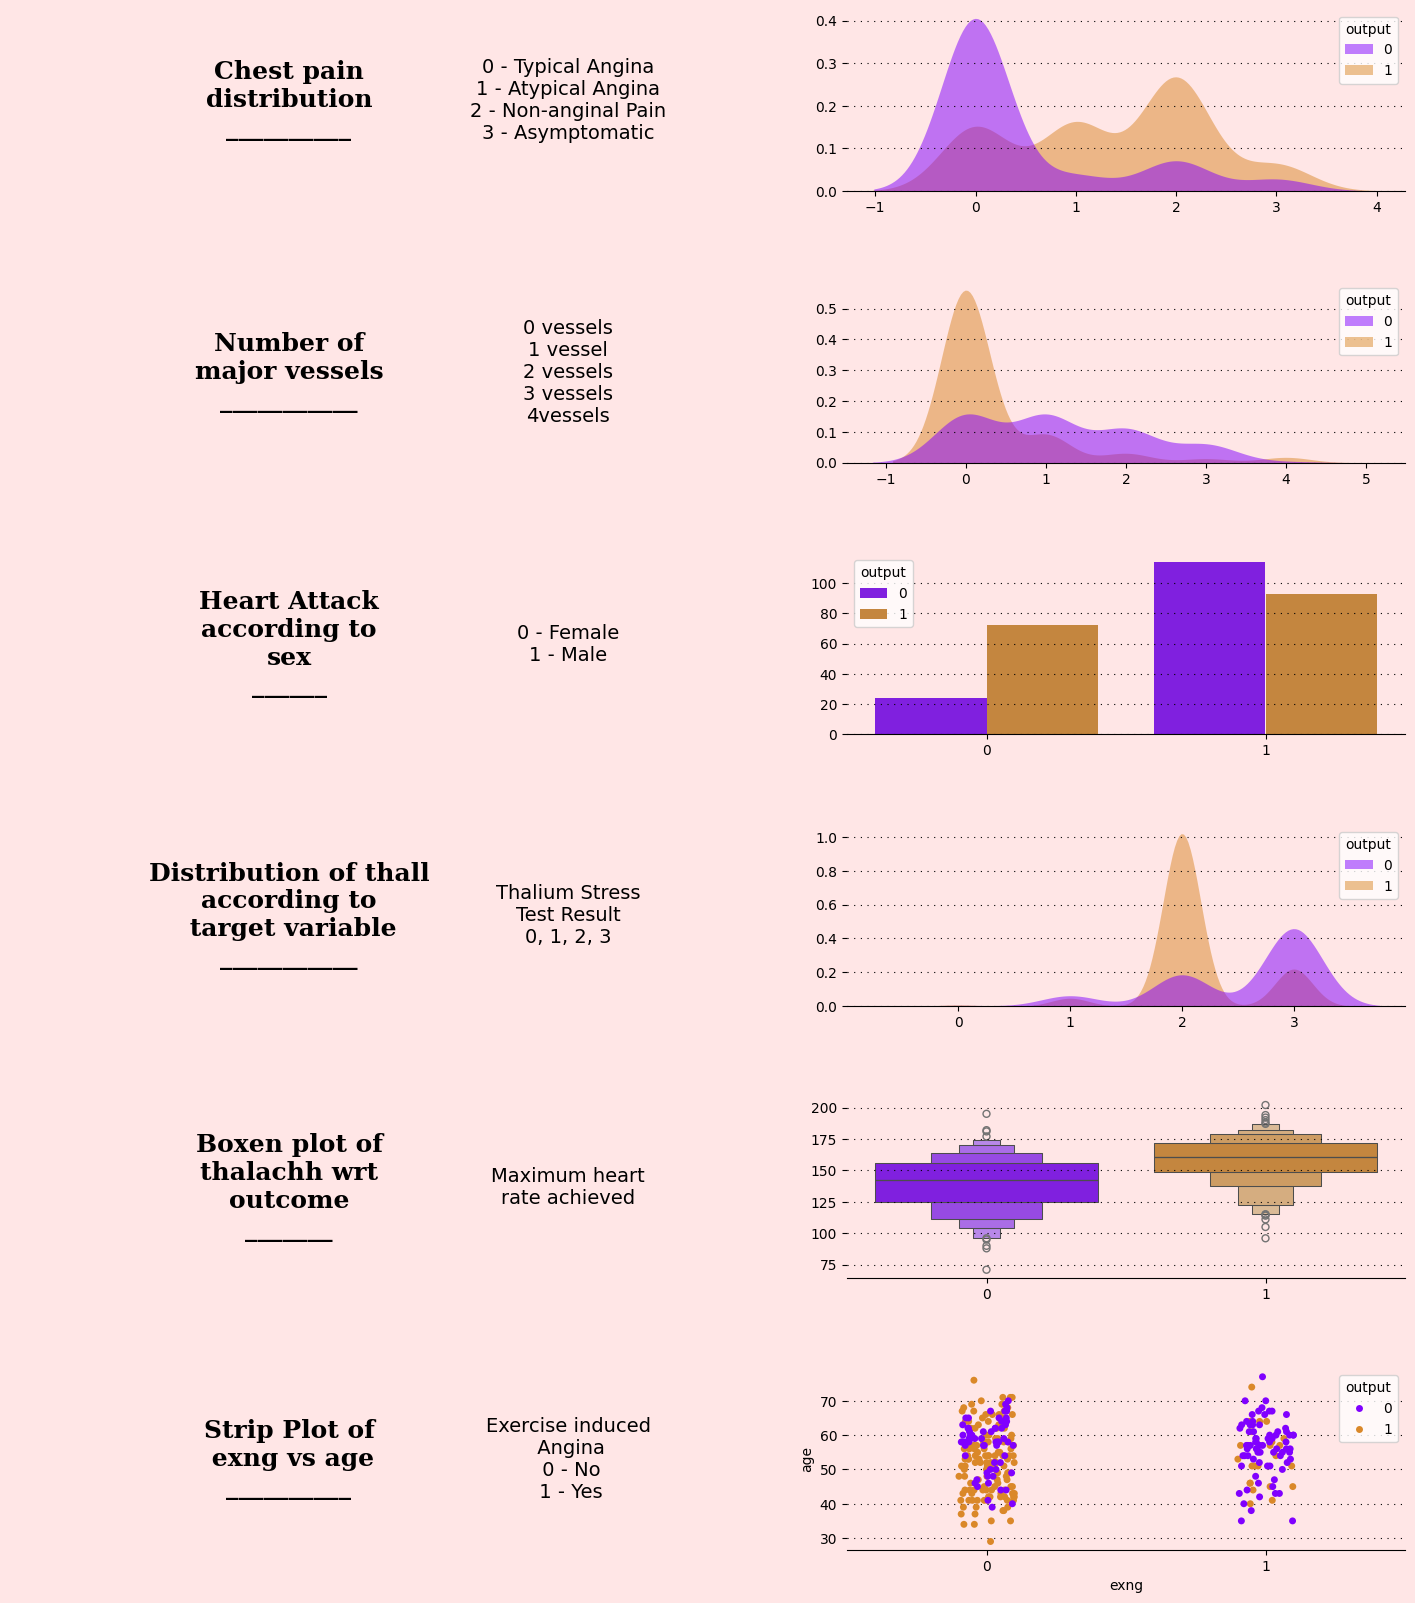

In [31]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6, 2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxen plot of\nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

# Exng title
ax10.text(0.5, 0.5, "Strip Plot of\n exng vs age\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight = 'bold',
        fontfamily = 'serif',
        color = '#000000')
ax10.text(1, 0.5, "Exercise induced\n Angina\n 0 - No\n 1 - Yes",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left = False, bottom = False)

# Exng
ax11.grid(color = '#000000', linestyle = ':', axis = 'y', zorder = 0, dashes = (1, 5))
sns.stripplot(ax = ax11, data = df, x = 'exng', y = 'age', hue = 'output', palette = ["#8000ff", "#da8829"])
ax11.set_xlabel = ("")
ax11.set_ylabel = ("")

for  i in ["top", "left", "right"]:
        ax0.spines[i].set_visible(False)
        ax1.spines[i].set_visible(False)
        ax2.spines[i].set_visible(False)
        ax3.spines[i].set_visible(False)
        ax4.spines[i].set_visible(False)
        ax5.spines[i].set_visible(False)
        ax6.spines[i].set_visible(False)
        ax7.spines[i].set_visible(False)
        ax8.spines[i].set_visible(False)
        ax9.spines[i].set_visible(False)
        ax10.spines[i].set_visible(False)
        ax11.spines[i].set_visible(False)

### Pairplot according to target variable - one plot to rule them all

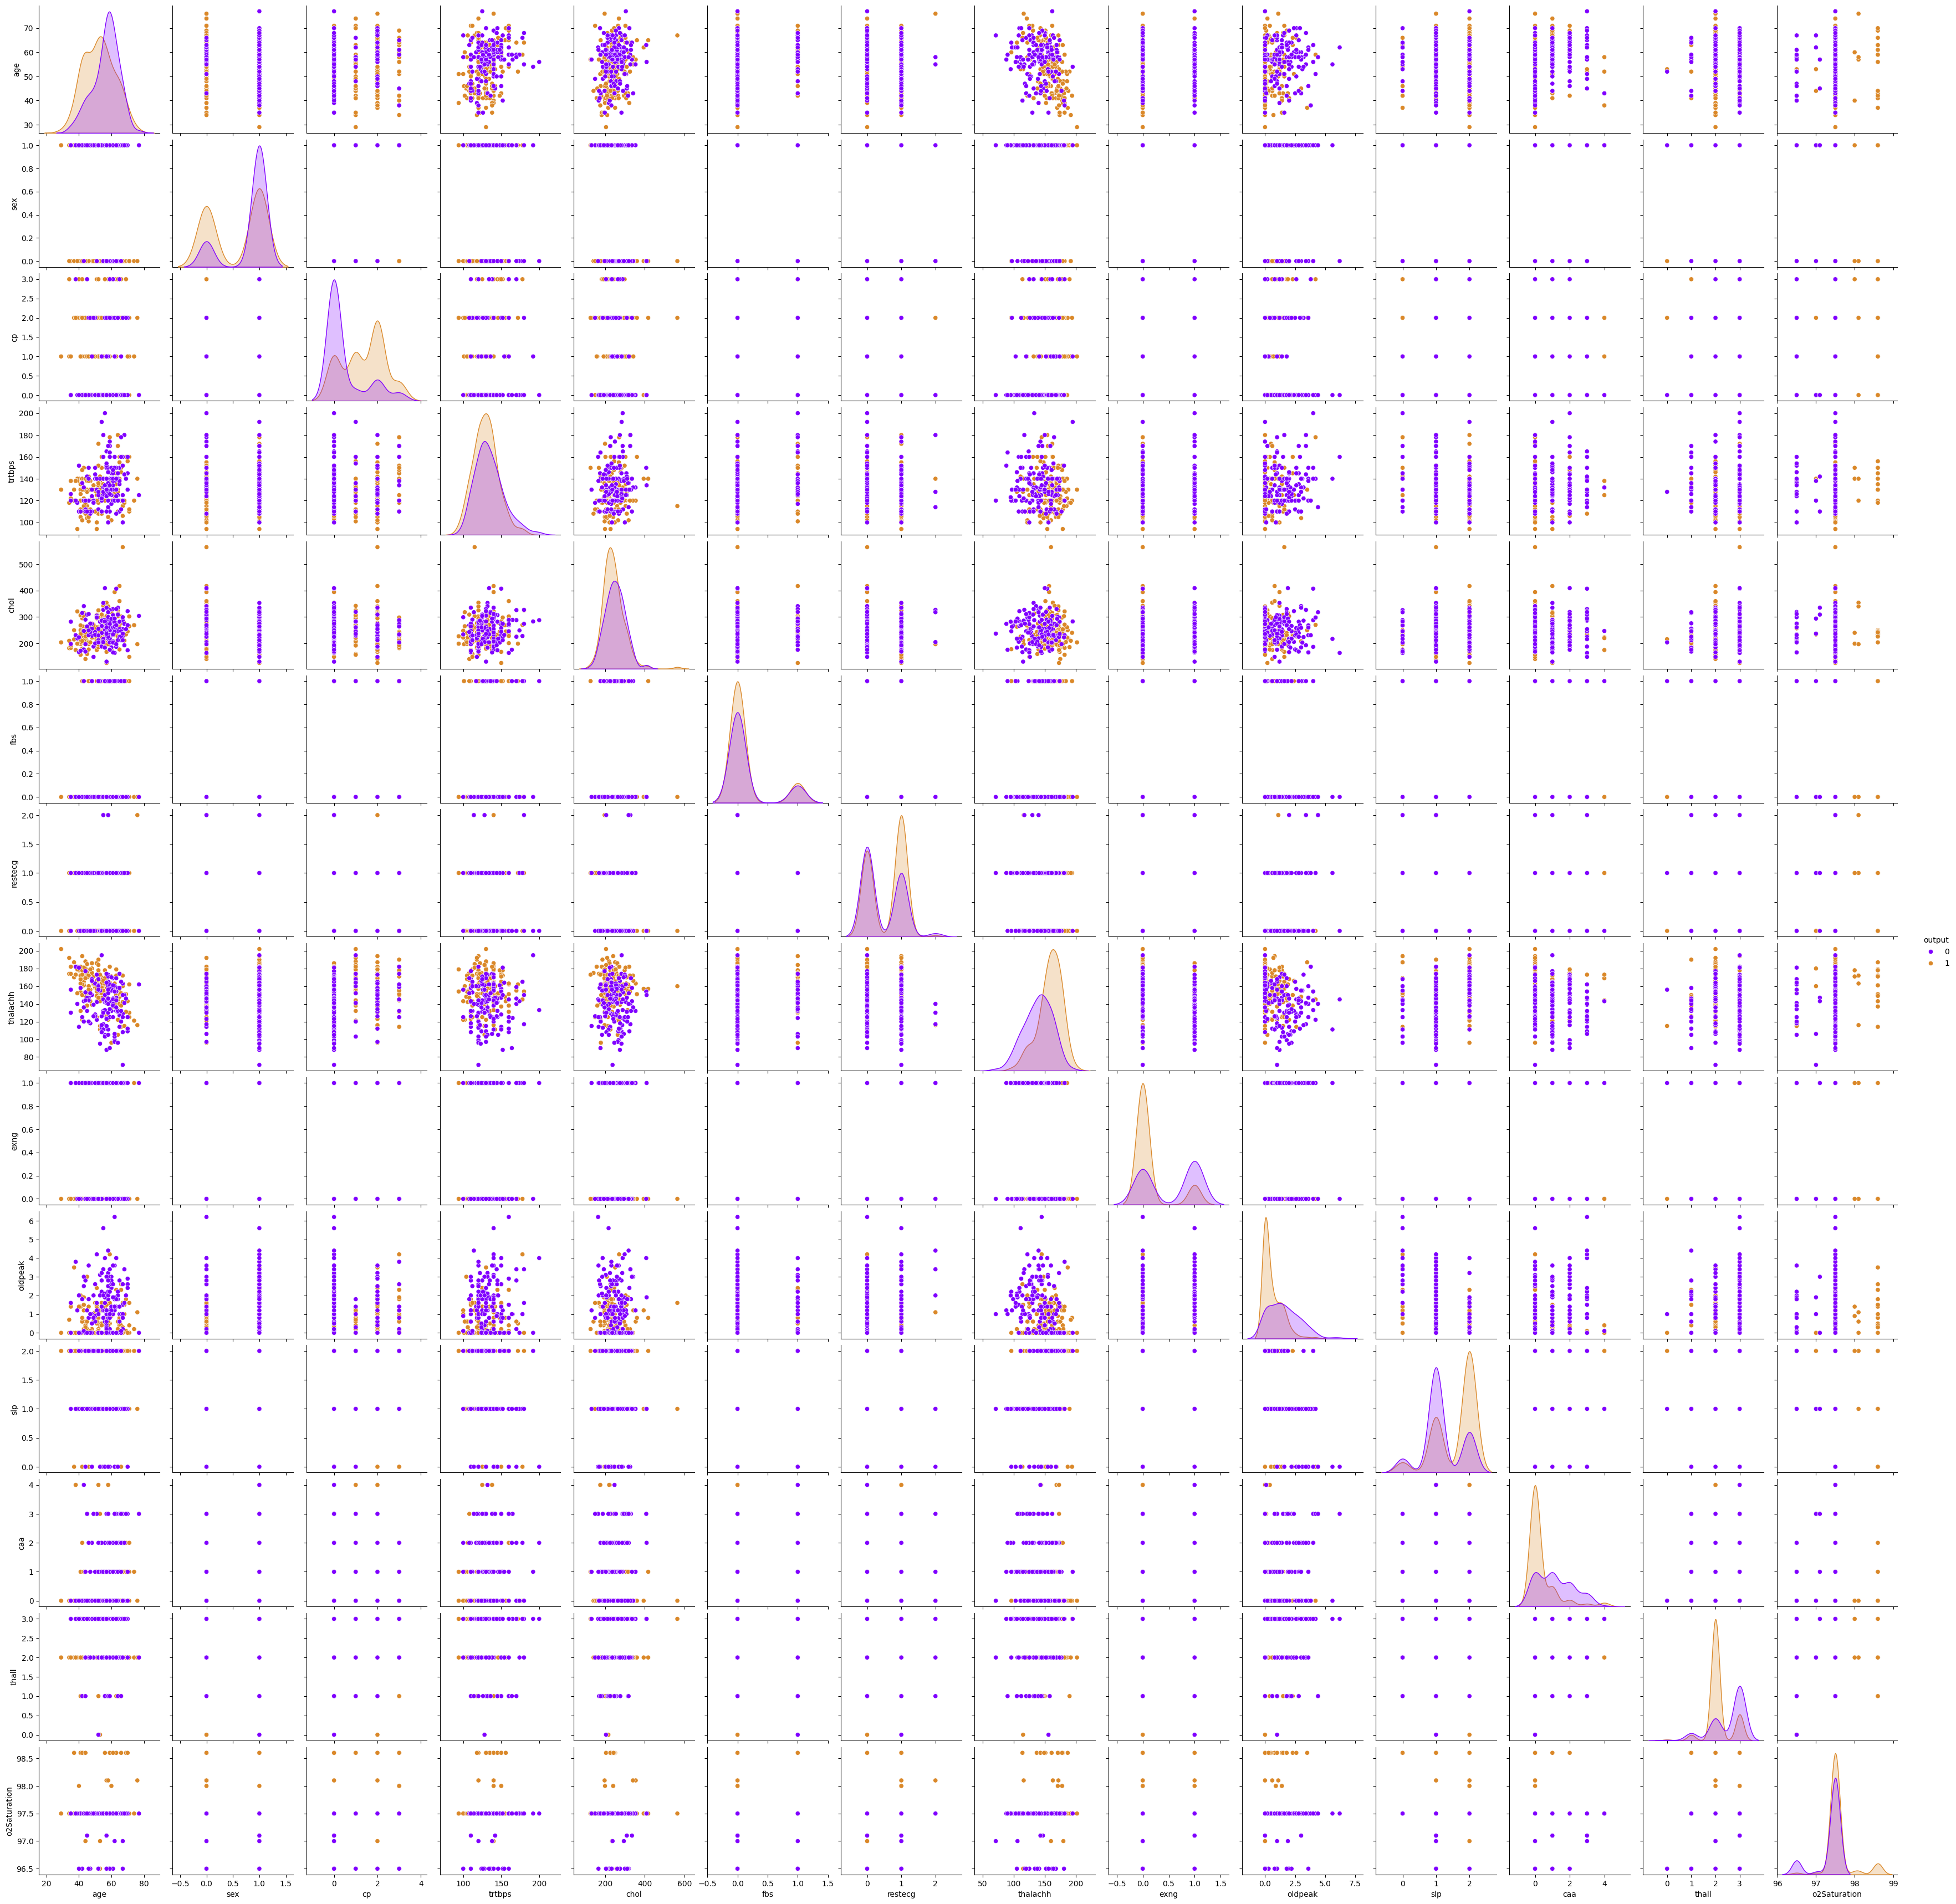

In [32]:
sns.pairplot(df, hue = 'output', palette = ["#8000ff", "#da8829"])
plt.show()

## Conclusions from the EDA

1. There are no NaN values in the data.
2. There are certain outliers in all the continuous features.
3. The data consists of more than twice the number of people with sex = 1 than sex = 0.
4. There is no apparent linear correlation between continuous variable according to the heatmap.
5. The scatterplot heatmap matrix suggests that there might be some correlation between output and cp, thalachh and slp.
6. It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age wrt output, it is evident that this isn't the case.
7. According to the distribution plot of thalachh wrt output, people with higher maximum heart rate achieved have higher chances of heart attack.
8. According to the distribution plot of oldpeak wrt output, people with lower pevious peak achieved have higher chances of heart attack.

9. The plot 3.2.4 tells about the following -

People with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.
People with 0 major vessels, that is with caa = 0 have high chance of heart attack.
People with sex = 1 have higher chance of heart attack.
People with thall = 2 have much higher chance of heart attack.
People with no exercise induced angina, that is with exng = 0 have higher chance of heart attack.

# Data Preprocessing

## Packages

In [33]:
# Scaling
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split, StratifiedKFold

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix

# Cross Validation
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

Packages imported...


Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

The concepts that are included in data preprocessing are :

1. Handling Null Values
2. Feature Scaling
3. Handling Categorical Variables

## 1. Handling Null Values :

Our data does not have any null values but in case we have missing values, we can remove the data as well.

However, it is not the best option to remove the rows and columns from our dataset as it can result in significant information loss. If you have 300K data points then removing 2–3 rows won’t affect your dataset much but if you only have 100 data points and out of which 20 have NaN values for a particular field then you can’t simply drop those rows. In real-world datasets, it can happen quite often that you have a large number of NaN values for a particular field. Ex — Suppose we are collecting the data from a survey, then it is possible that there could be an optional field which let’s say 20% of people left blank. So when we get the dataset then we need to understand that the remaining 80% of data is still useful, so rather than dropping these values we need to somehow substitute the missing 20% values. We can do this with the help of Imputation.

Imputation:
Imputation is simply the process of substituting the missing values of our dataset. We can do this by defining our own customised function or we can simply perform imputation by using the SimpleImputer class provided by sklearn.

In [34]:
# For example :

# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = imputer.fit(df[['Weight']])
# df['Weight'] = imputer.transform(df[['Weight']])

As we do not have any missing data so we will not be using this approch

## 2. Feature Scaling :

I. Distance Based Algorithms :

Distance algorithms like "KNN", "K-means" and "SVM" are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity. When two features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.

Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.

II Tree-Based Algorithms :
Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.

So, there is virtually no effect of the remaining features on the split. This is what makes them invariant to the scale of the features!

What is Normalization?
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here's the fromula for normalization :

xscaled = x - xmin / xmax - xmin

What is Standardization?
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation

Here's the formula for Standarization:

Z = X - mu / rho

*The Big Question* – Normalize or Standardize?

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data.

Robust Scaler

When working with outliers we can use Robust Scaling for scaling our data, It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. RobustScaler uses the interquartile range so that it is robust to outliers.

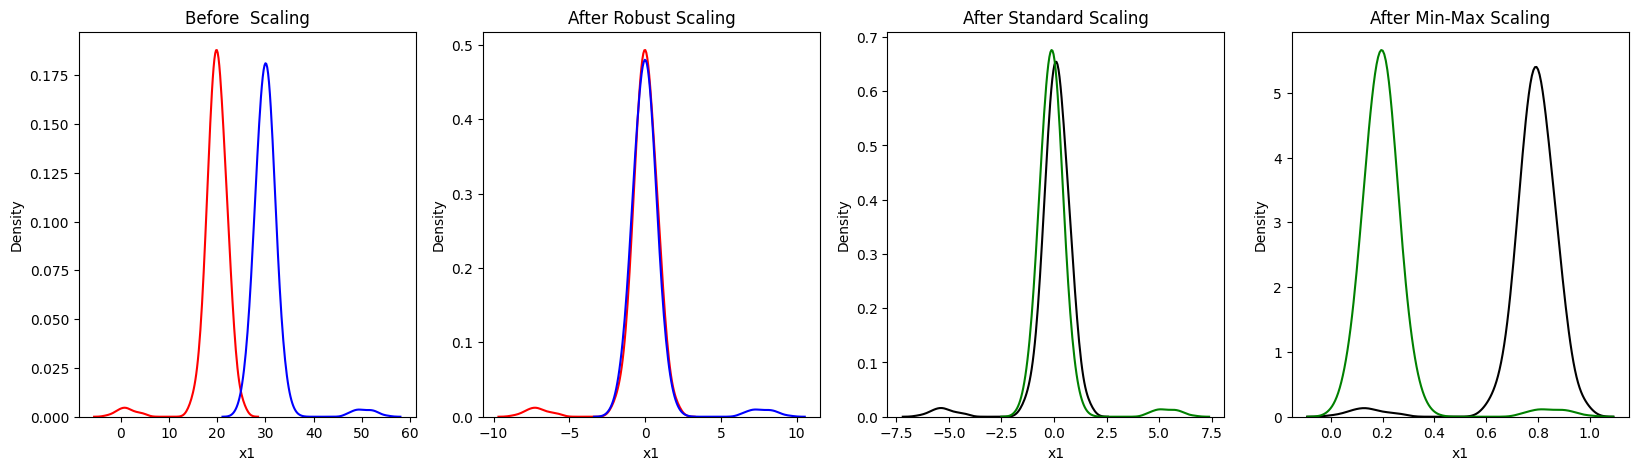

In [35]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1' : np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2' : np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns = ['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns = ['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns = ['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (20, 5))
ax1.set_title('Before  Scaling')

sns.kdeplot(x['x1'], ax = ax1, color = 'r')
sns.kdeplot(x['x2'], ax = ax1, color = 'b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color = 'red')
sns.kdeplot(robust_df['x2'], ax = ax2, color = 'blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color = 'black')
sns.kdeplot(standard_df['x2'], ax = ax3, color = 'g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color = 'black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color = 'g')
plt.show()

## 3. Handling Categorical Variables

Categorical variables/features are any feature type can be classified into two major types:

Nominal
Ordinal

Nominal variables are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable.Ordinal variables, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.

It is a binary classification problem: the target here is not skewed but we use the best metric for this binary classification problem which would be Area Under the ROC Curve (AUC). We can use precision and recall too, but AUC combines these two metrics. Thus, we will be using AUC to evaluate the model that we build on this dataset.

We have to know that computers do not understand text data and thus, we need to convert these categories to numbers. A simple way of doing that can be to use :

Label Encoding
from sklearn.preprocessing import LabelEncoder

One Hot Encoding
pd.get_dummies()

but we need to understand where to use which type of label encoding:

For not Tree based Machine Learning Algorithms the best way to go will be to use One-Hot Encoding

One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space.
The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction. I find that the judicious combination of one-hot plus PCA can seldom be beat by other encoding schemes. PCA finds the linear overlap, so will naturally tend to group similar features into the same feature

For Tree based Machine Learning Algorithms the best way to go is with Label Encoding

LabelEncoder can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.

In [36]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding 
# which will be used with Tree Based Algorthms

#df_tree = df.apply(LabelEncoder().fit_transform)
#df_tree.head()

We can use this directly in many tree-based models:

Decision trees
Random forest
Extra Trees
Or any kind of boosted trees model
XGBoost
GBM
LightGBM

This type of encoding cannot be used in linear models, support vector machines or neural networks as they expect data to be normalized (or standardized). For these types of models, we can binarize the data. As shown bellow :

In [37]:
#Creating one hot encoded features for working with non tree based algorithms

#df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
#df_nontree.head()

In [38]:
# Getting the target column at the end

#target = "output"
#y = df_nontree[target].values
#df_nontree.drop("output",axis=1,inplace=True)
#df_nontree=pd.concat([df_nontree,df[target]],axis=1)
#df_nontree.head()

## Feature Scaling and Encoding

In [39]:
# Creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak", "o2Saturation"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)
print(df1.head())

# defining the features and target
X = df1.drop(['output'], axis = 1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous feature
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

   age  trtbps  chol  thalachh  oldpeak  o2Saturation  output  sex_1   cp_1  \
0   63     145   233       150      2.3          98.6       1   True  False   
1   37     130   250       187      3.5          98.6       1   True  False   
2   41     130   204       172      1.4          98.6       1  False   True   
3   56     120   236       178      0.8          98.6       1   True   True   
4   57     120   354       163      0.6          98.1       1  False  False   

    cp_2  ...  exng_1  slp_1  slp_2  caa_1  caa_2  caa_3  caa_4  thall_1  \
0  False  ...   False  False  False  False  False  False  False     True   
1   True  ...   False  False  False  False  False  False  False    False   
2  False  ...   False  False   True  False  False  False  False    False   
3  False  ...   False  False   True  False  False  False  False    False   
4  False  ...    True  False   True  False  False  False  False    False   

   thall_2  thall_3  
0    False    False  
1     True    False  
2 

,age,trtbps,chol,thalachh,oldpeak,o2Saturation,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1.1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.333333,0.00,0.157480,1.046154,1.6875,1.1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1.1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1.1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0.6,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


## Choosing the right Cross - Validation Technique

Choosing the right cross-validation depends on the dataset you are dealing with, and one’s choice of cross-validation on one dataset may or may not apply to other datasets. However, there are a few types of cross-validation techniques which are the most popular and widely used. These include:

k-fold cross-validation
stratified k-fold cross-validation Cross-validation is dividing training data into a few parts. We train the model on some of these parts and test on the remaining parts

1. K-fold cross-validation :
As you can see, we divide the samples and the targets associated with them. We can divide the data into k different sets which are exclusive of each other. This is known as k-fold cross-validation, We can split any data into k-equal parts using KFold from scikit-learn. Each sample is assigned a value from 0 to k-1 when using k-fold cross validation.

2. Stratified k-fold cross-validation :
If you have a skewed dataset for binary classification with 90% positive samples and only 10% negative samples, you don't want to use random k-fold cross-validation. Using simple k-fold cross-validation for a dataset like this can result in folds with all negative samples. In these cases, we prefer using stratified k-fold cross-validation. Stratified k-fold cross-validation keeps the ratio of labels in each fold constant. So, in each fold, you will have the same 90% positive and 10% negative samples. Thus, whatever metric you choose to evaluate, it will give similar results across all folds.

## Splitting the dataset into training and testing data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("The shape of X_train is     ", X_train.shape)
print("The shape of X_test is     ", X_test.shape)
print("The shape of y_train is     ", y_train.shape)
print("The shape of y_test is     ", y_test.shape)

The shape of X_train is      (242, 23)
The shape of X_test is      (61, 23)
The shape of y_train is      (242, 1)
The shape of y_test is      (61, 1)


# Modeling

## Linear Classifiers

### 1. Logistic Regression

Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc.

Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical. Written like this:

P(Y=1|X) or P(Y=0|X)

It calculates the probability of dependent variable Y, given independent variable X.

This can be used to calculate the probability of a word having a positive or negative connotation (0, 1, or on a scale between). Or it can be used to determine the object contained in a photo (tree, flower, grass, etc.), with each object given a probability between 0 and 1.

In [41]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# Calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# Finding the predicted valued
y_pred = np.argmax(y_pred_proba, axis = 1)

# Calculating the confusion matrix
conf = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print("Confusion Matrix : \n", conf)

# printing the test accuracy
print("The test accuracy score of Logistic Regression is ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[28  1]
 [ 4 28]]
The test accuracy score of Logistic Regression is  0.9180327868852459


#### ROC Curve

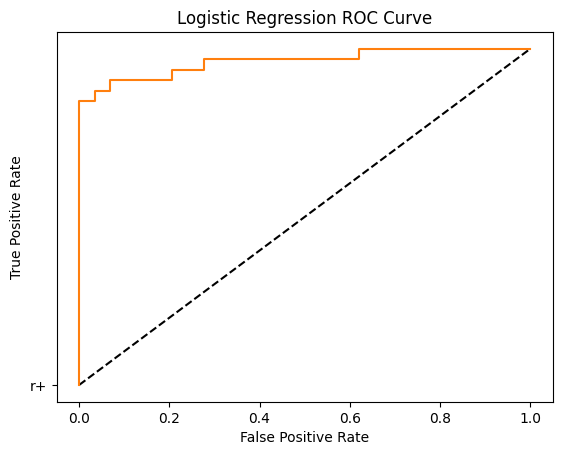

In [42]:
# Calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Instantiating the roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotting the curve
plt.plot([0, 1], [0, 1], "k--", 'r+')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### 2. Gaussian Naive Bayes

In [43]:
# instantiating the object
GausNB = GaussianNB()

# fitting the object
GausNB.fit(X_train, y_train)

# Calculating the probabilities
y_pred_proba = GausNB.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Gaussian Naive Bayes is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gaussian Naive Bayes is  0.9180327868852459


### 3. Bernoulli Naive Bayes

In [44]:
# instantiating the object
BernNB = BernoulliNB()

# fitting the object
BernNB.fit(X_train, y_train)

# Calculating the probabilities
y_pred_proba = BernNB.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Bernoulli Naive Bayes is ", accuracy_score(y_test, y_pred))

The test accuracy score of Bernoulli Naive Bayes is  0.9180327868852459


### 4. Support Vector Machines

A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction.

For a simple visual explanation, we’ll use two tags: red and blue, with two data features: X and Y, then train our classifier to output an X/Y coordinate as either red or blue.

The SVM then assigns a hyperplane that best separates the tags. In two dimensions this is simply a line. Anything on one side of the line is red and anything on the other side is blue. In sentiment analysis, for example, this would be positive and negative.

In order to maximize machine learning, the best hyperplane is the one with the largest distance between each tag:

However, as data sets become more complex, it may not be possible to draw a single line to classify the data into two camps:

Using SVM, the more complex the data, the more accurate the predictor will become. Imagine the above in three dimensions, with a Z-axis added, so it becomes a circle.

Mapped back to two dimensions with the best hyperplane, it looks like this

SVM allows for more accurate machine learning because it’s multidimensional.

We need to choose the best Kernel according to our need.

The linear kernel is mostly preferred for text classification problems as it performs well for large datasets.

Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.

Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.

Polynomial kernels give good results for problems where all the training data is normalized.

In [45]:
# Using Linear Kernel
clf = SVC(kernel = 'linear', C = 1, random_state = 42).fit(X_train, y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Linear SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of Linear SVM is  0.9180327868852459


In [46]:
# Using Sigmoid Kernel
clf = SVC(kernel = 'sigmoid', C = 1, random_state = 42).fit(X_train, y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Sigmoid SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of Sigmoid SVM is  0.8524590163934426


In [47]:
# Using rbf Kernel
clf = SVC(kernel = 'rbf', C = 1, random_state = 42).fit(X_train, y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of rbf SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of rbf SVM is  0.9180327868852459


In [48]:
# Using Polynomial Kernel
clf = SVC(kernel = 'poly', C = 1, random_state = 42).fit(X_train, y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Polynomial SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of Polynomial SVM is  0.8688524590163934


#### Hyperparameter tuning of SVC

In [49]:
# Instantiating the object
svm = SVC()

# setting the grid - not so extensive
parameters = {"C" : np.arange(1, 10, 1), 'gamma' : [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]}

# Instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 5, 'gamma': 0.1}
The best score is : 0.8553571428571429
The test accuracy score of SVM after hyper-parameter tuning is  0.8852459016393442


### 5. K Nearest Neighbours

The optimal K value usually found is the square root of N, where N is the total number of samples

K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples.

When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.

In [50]:
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(X_train, y_train)
predicted = KNN.predict(X_test)

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round()) * 100, "%")

[[25  4]
 [ 6 26]]
The accuracy of KNN is :  83.60655737704919 %


#### Optimizing the KNN

Text(0, 0.5, 'Error Rate')

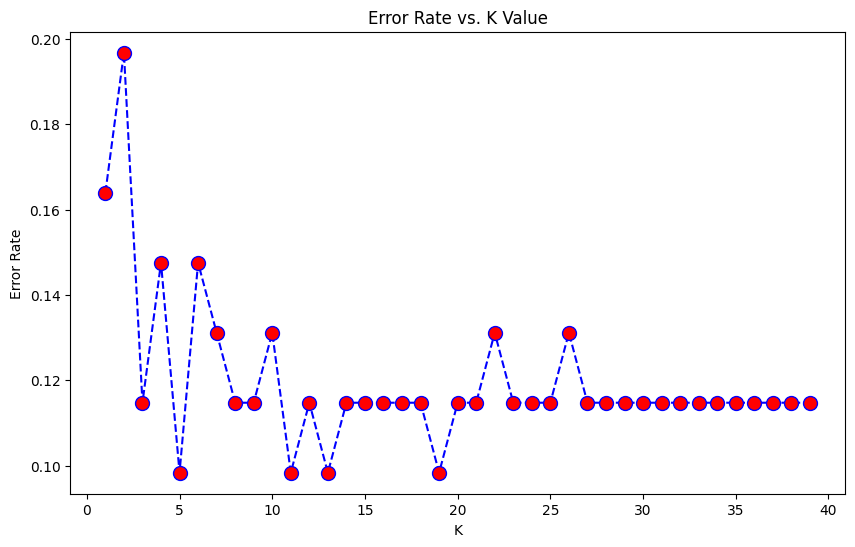

In [51]:
error_rate = []

for i in range(1, 40):

    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, y_train)
    pred_i = KNN.predict(X_test)
    pred_i = pred_i.reshape(61, 1)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel("Error Rate")

With k = 5 as it hovers after that

In [52]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
predicted = KNN.predict(X_test)

print("Confusion Matrix :")
print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round()) * 100, "%")

Confusion Matrix :
[[26  3]
 [ 3 29]]
The accuracy of KNN is :  90.1639344262295 %


## Tree Models

### 1. Decision Tree

A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.

In [53]:
# Instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# Fitting the model
dt.fit(X_train, y_train)

# Calculating the predictions
y_pred = dt.predict(X_test)

# Printing the test accuracy
print("The test accuracy of Decision Trees is ", accuracy_score(y_test, y_pred))

The test accuracy of Decision Trees is  0.7704918032786885


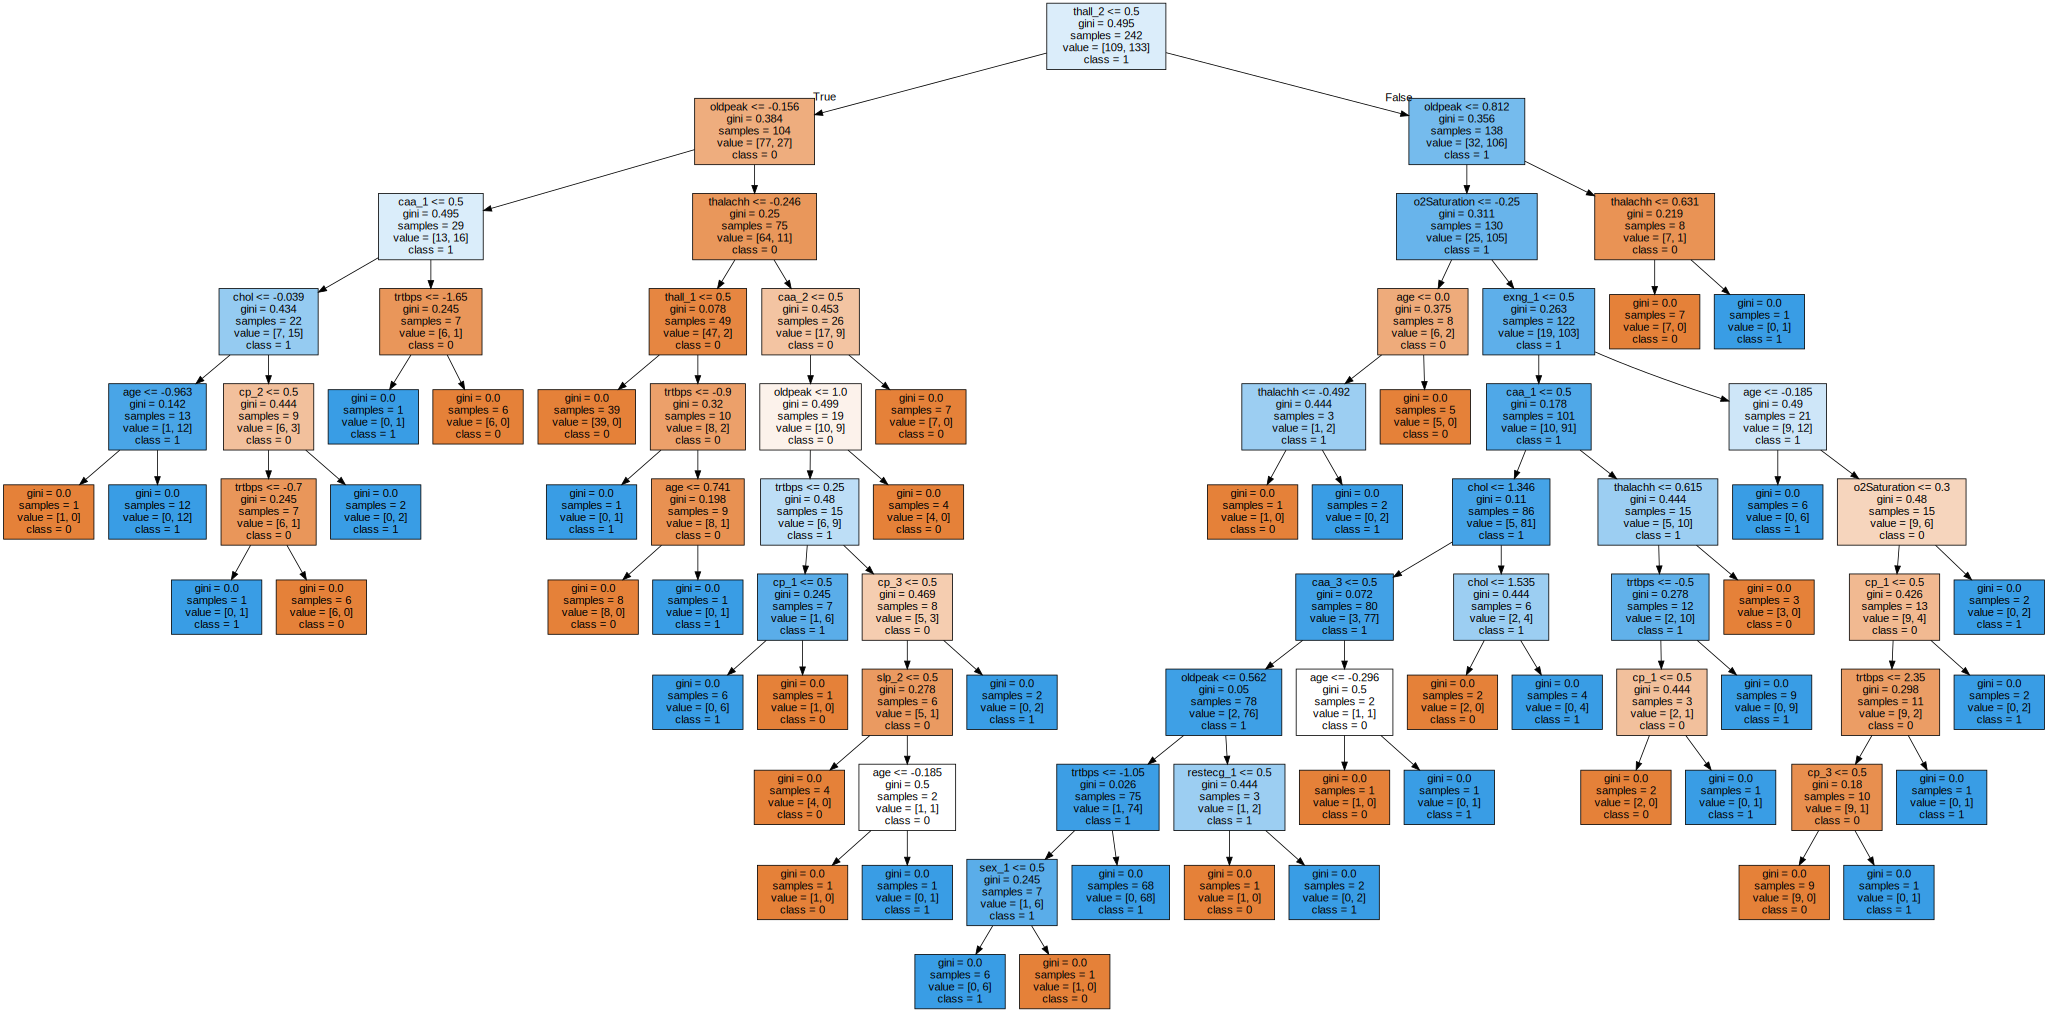

In [54]:
import graphviz
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(dt, out_file = None, feature_names = X_train.columns, class_names = [str(i) for i in dt.classes_], filled = True)

# Draw graph
graph = graphviz.Source(dot_data, format = "png")
graph.render("Decision_Tree", cleanup = True)
graph

### 2. Random Forest

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction.

In [55]:
# Instantiating the object
rf = RandomForestClassifier(n_estimators = 200, criterion = "entropy")

# Fitting the model
rf.fit(X_train, y_train)

# Calculating the predictions
y_pred = dt.predict(X_test)

# Printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7704918032786885


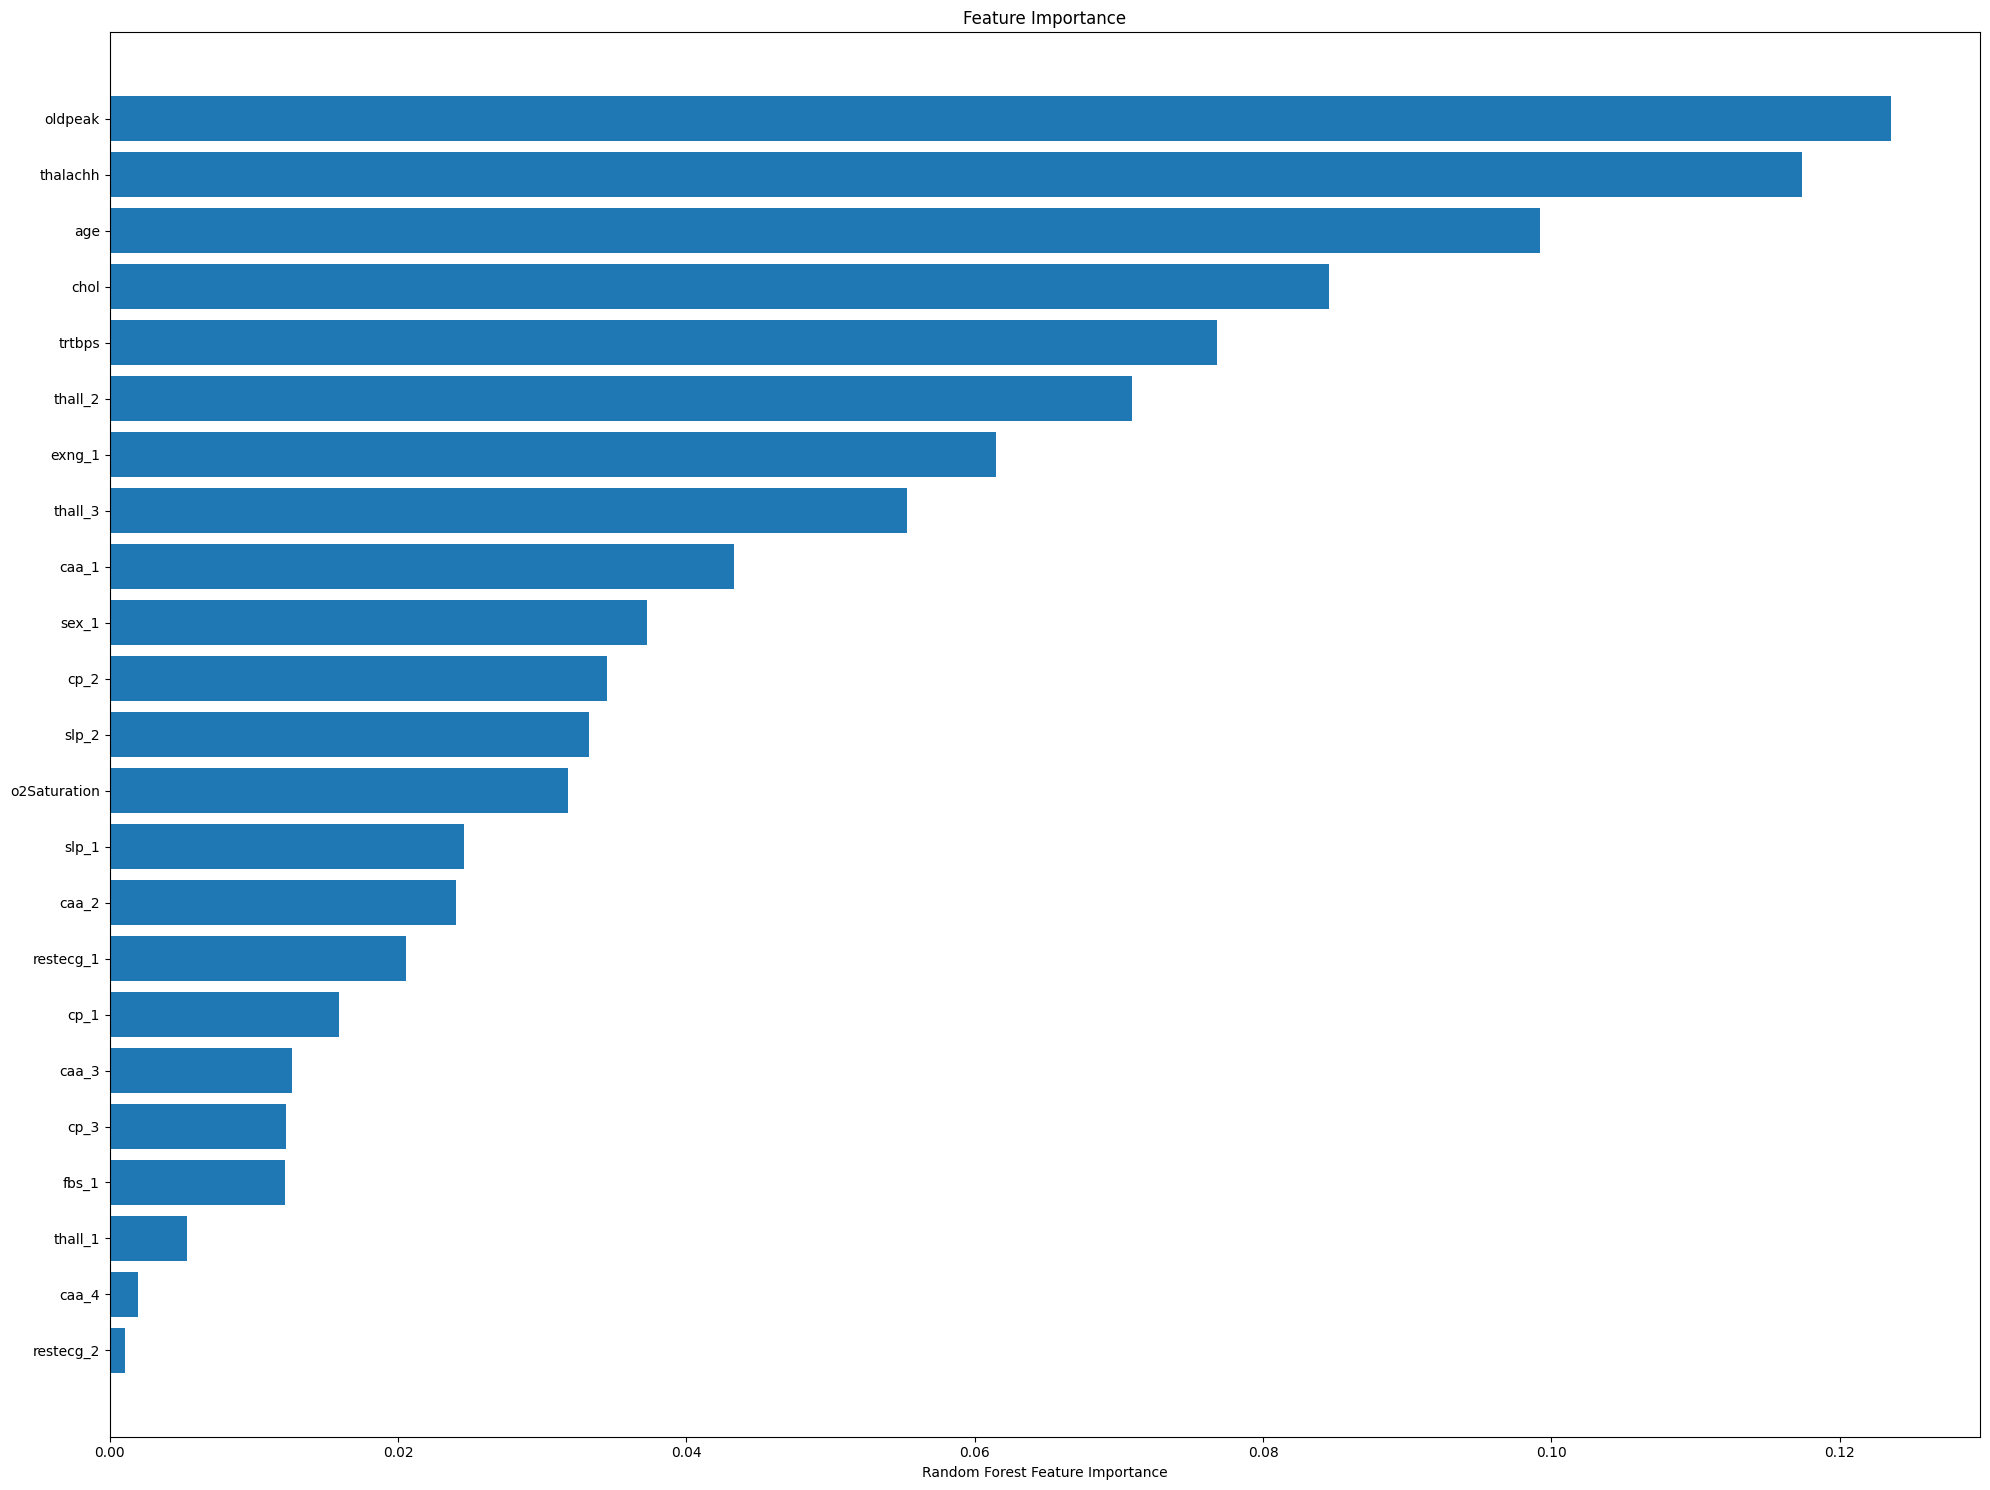

In [56]:
# Checking Feature Importance

plt.figure(figsize = (20, 15))
importance = rf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)), importance[idxs], align = "center")
plt.yticks(range(len(idxs)), [X.columns [i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

### 3. XGBoost

Unlike many other algorithms, XGBoost is an ensemble learning algorithm meaning that it combines the results of many models, called base learners to make a prediction.

Just like in Random Forests, XGBoost uses Decision Trees as base learners:

However, the trees used by XGBoost are a bit different than traditional decision trees. They are called CART trees (Classification and Regression trees) and instead of containing a single decision in each “leaf” node, they contain real-value scores of whether an instance belongs to a group. After the tree reaches max depth, the decision can be made by converting the scores into categories using a certain threshold.

In [57]:
# instantiating the object
xgboost = xgb.XGBClassifier()

# fitting the object
xgboost.fit(X_train, y_train)

# predicting values
y_pred = xgboost.predict(X_test)

# Calculating the confusion matrix
conf = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print("Confusion Matrix : \n", conf)

# printing the test accuracy
print("The test accuracy score of XG Boost is ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[26  3]
 [ 7 25]]
The test accuracy score of XG Boost is  0.8360655737704918


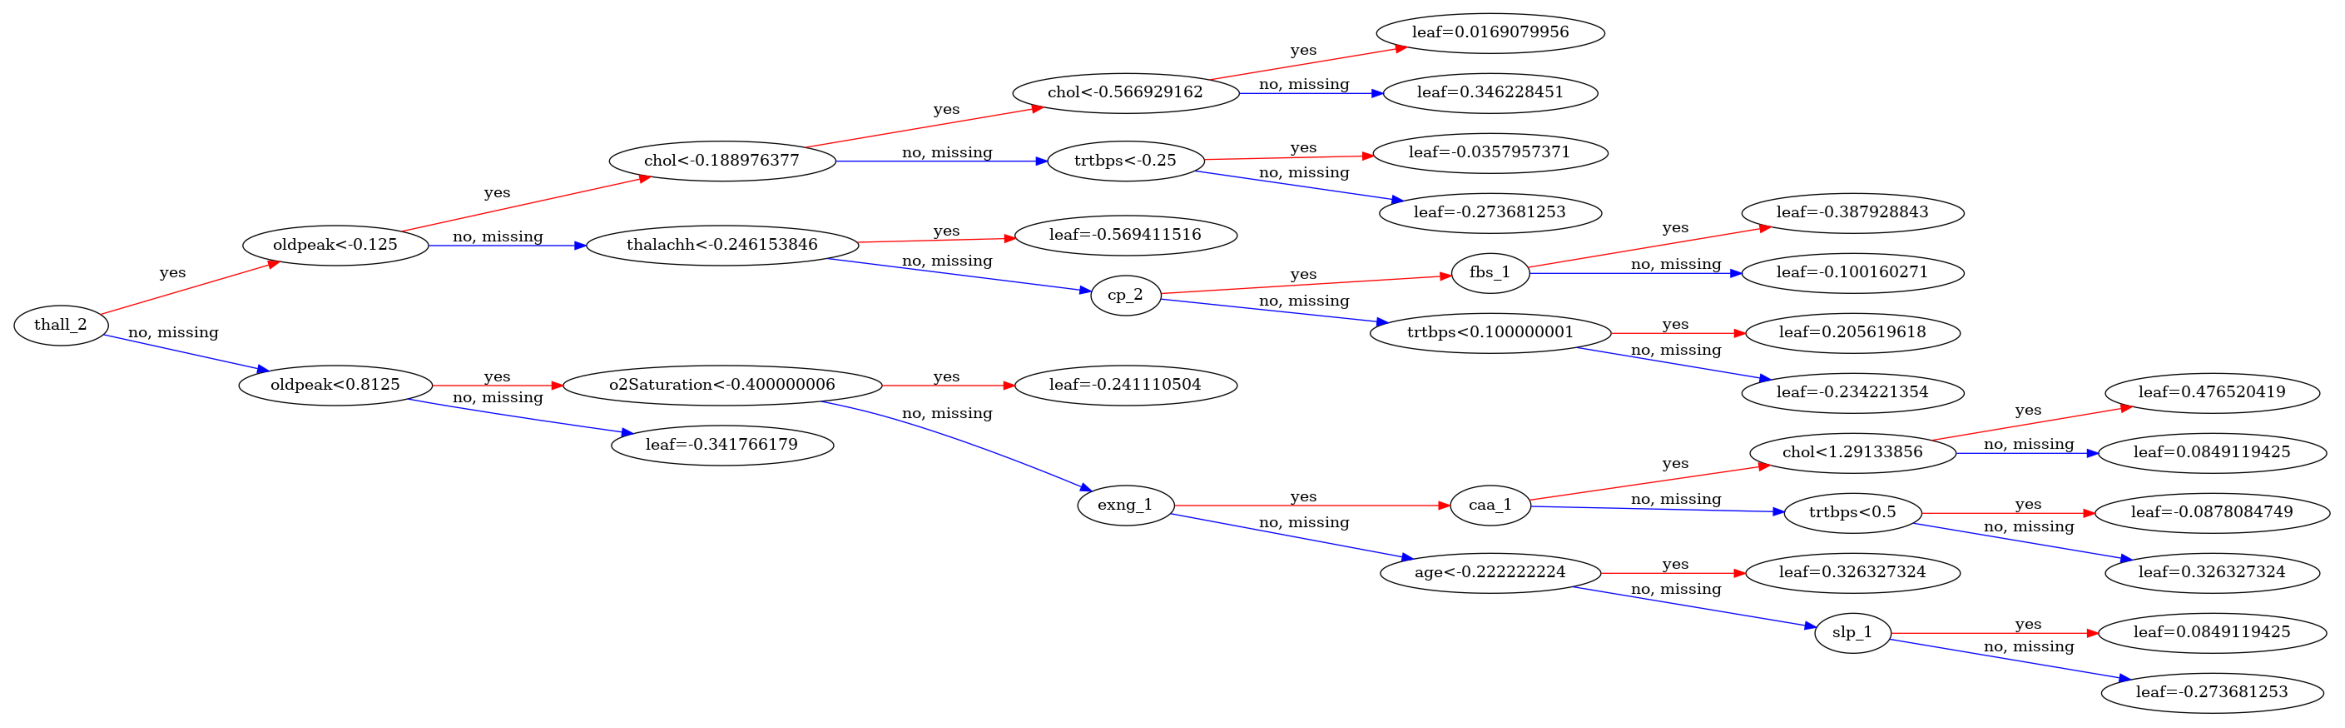

In [58]:
fig, ax = plt.subplots(figsize = (30, 30))
from xgboost import plot_tree
plot_tree(xgboost, num_trees = 0, rankdir = 'LR', ax = ax)
plt.savefig("xgboost_tree.png")
plt.show()

# Conclusion

1. Most of the models are performing really well.
2. Logistic Regression and SVM are performing the best for the given dataset.